<h1> Webtoon Originals Data Analysis </h1>

This dataset contains information on all english webtoons including their subscribers, likes, views, name, etc

Here's The Link to the Data Set: https://www.kaggle.com/iridazzle/webtoon-originals-datasets?select=webtoon_originals_en.csv

You simply press download.

My two interesting questions are:

Does the length affect the number of subscribers?

Do likes and views correlate?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1>Loading the data into a pandas dataframe</h1>

In [2]:
df = pd.read_csv("webtoon_originals_en.csv")
df

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,daily_pass,synopsis
0,3923,Island,ACTION,"Inwan Youn,Kyungil Yang",SUNDAY,6,16616,9,64124,6552,ONGOING,True,“I’ll offer you 50 million won for every demon...
1,3922,Deadlife,ACTION,"Hooressha,Jinguk Lim",SUNDAY,6,44466,9,291920,32125,ONGOING,True,"Am I dead, or am I alive? After Seong-hun gets..."
2,3921,The Final Raid Boss,FANTASY,"KIM JANGHUN,HA SEONGSHIN,PARK SUBONG",WEDNESDAY,3,94324,9,320455,31955,ONGOING,False,"Daejang Gong, aka Raid Leader, used to be rank..."
3,3920,Regina Rena: To the Unforgiven,FANTASY,"Seol Dong-Won,NANA,kim youngji",TUESDAY,4,318140,10,1380369,161004,ONGOING,False,Rena Rubel is a beautiful woman who has faced ...
4,3919,Love and Leashes,ROMANCE,Winter,FRIDAY,6,204540,8,3861018,309814,ONGOING,True,Jihu has a secret kink and has finally met the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,68,Tales of the Unusual,HORROR,Sungdae Oh,SUNDAY,351,741508,10,142827542,8573716,ONGOING,False,In dangerous urban legends and dark ancient my...
670,67,Knight Run,SF,Sungmin Kim,TUESDAY,170,91273,9,4589262,161513,COMPLETED,False,If you could be teleported down to the planet’...
671,66,The God of High School,ACTION,Yongje Park,FRIDAY,532,2526720,10,696346721,26612744,ONGOING,False,Mori Jin is a high school student and Taekwond...
672,65,HIVE,THRILLER,Kyusam Kim,MONDAY,17,455220,10,66134028,2822223,COMPLETED,True,Gigantic oxygen-doped bees are attempting to d...


<h1>Rough Overview Of The Data</h1>

In [3]:
df.describe()

,title_id,length,subscribers,rating,views,likes
count,674.000000,674.000000,6.740000e+02,674.000000,6.740000e+02,6.740000e+02
mean,1899.335312,83.805638,4.808742e+05,9.508902,4.320108e+07,3.219498e+06
std,1106.347809,128.307519,6.890569e+05,0.713327,1.089118e+08,6.527431e+06
min,64.000000,1.000000,5.836000e+03,5.000000,6.412400e+04,6.552000e+03
25%,992.250000,18.000000,1.190582e+05,9.000000,2.805274e+06,2.910738e+05
50%,1833.000000,41.500000,2.455640e+05,10.000000,9.226941e+06,8.416205e+05
75%,2764.750000,98.500000,5.679048e+05,10.000000,3.089099e+07,2.938245e+06
max,3923.000000,1352.000000,6.951422e+06,10.000000,1.016360e+09,5.536394e+07


<h1>The Array Of Columns In The Data Set</h1>

In [4]:
list(df.columns)

['title_id',
 'title',
 'genre',
 'authors',
 'weekdays',
 'length',
 'subscribers',
 'rating',
 'views',
 'likes',
 'status',
 'daily_pass',
 'synopsis']

<h1>The Array Of Index In The Data Set</h1>

In [5]:
list(df.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


<h1> Simple Plot </h1>

In [6]:
X = df[df['genre'] == "ACTION"]
X = X.sort_values("views")
X

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,daily_pass,synopsis
0,3923,Island,ACTION,"Inwan Youn,Kyungil Yang",SUNDAY,6,16616,9,64124,6552,ONGOING,True,“I’ll offer you 50 million won for every demon...
15,3792,The Retreats,ACTION,"Hyungwook Shin,Sunhee Kim",SUNDAY,7,36235,9,150496,15647,ONGOING,False,"In the distant future, people live in abundanc..."
10,3911,Hwarang: Flower Knights of the Underworld,ACTION,"hwieum,striy",FRIDAY,5,80878,9,262596,31436,ONGOING,False,"Seventeen-year-old Junhwi Kang, who can see gh..."
1,3922,Deadlife,ACTION,"Hooressha,Jinguk Lim",SUNDAY,6,44466,9,291920,32125,ONGOING,True,"Am I dead, or am I alive? After Seong-hun gets..."
14,3907,Psychic Studies,ACTION,PARK EUN HYUK,MONDAY,6,92806,9,476444,53885,ONGOING,False,“You are getting very sleepy…” Chankyu Kim lea...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,93,Girls of the Wild's,ACTION,"HUN,ZHENA",SUNDAY,15,838822,10,169977468,7227701,COMPLETED,True,"Wild's High School, an all girls educational i..."
479,1221,Hardcore Leveling Warrior,ACTION,Sehoon Kim,FRIDAY,308,1284326,10,218582154,14684039,ONGOING,False,"Known as Hardcore Leveling Warrior, Ethan is t..."
650,88,The Gamer,ACTION,"Sangyoung Seong,Sang-A",FRIDAY,394,1985644,10,415707494,18123357,ONGOING,False,Jihan Han is your typical high school student ...
651,87,Noblesse,ACTION,"Jeho Son,Kwangsu Lee",TUESDAY,50,1780413,10,422545853,20205508,COMPLETED,True,Rai wakes up from an 820-year-long sleep and s...


Text(0.5, 1.0, 'Views vs Likes')

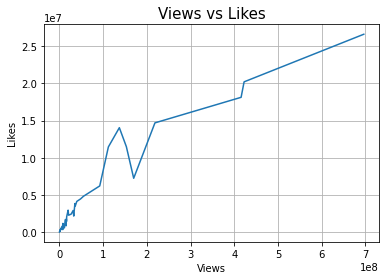

In [7]:
plt.plot(X["views"], X["likes"])
plt.grid()
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Views vs Likes", fontsize=15)

<h1> Pivot Table </h1>

In [15]:
column = 'likes'

Y = pd.pivot_table(df, values=column, index = ["rating"], columns = ["genre"])
Y

genre,ACTION,COMEDY,DRAMA,FANTASY,HEARTWARMING,HISTORICAL,HORROR,MYSTERY,ROMANCE,SF,SLICE_OF_LIFE,SPORTS,SUPERNATURAL,SUPER_HERO,THRILLER,TIPTOON
rating,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.953400e+04,NaN,NaN,6.929400e+04,NaN,NaN,NaN,NaN
6,NaN,4.197715e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.601910e+05,NaN,NaN,NaN,NaN,NaN
7,NaN,9.384300e+04,1.991700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522500e+04,2.721550e+04,NaN,NaN
8,NaN,7.217700e+04,NaN,3.248545e+05,NaN,NaN,NaN,22982.0,5.382766e+05,70570.00,1.887403e+05,NaN,5.834640e+05,5.363350e+04,1.031024e+06,71740.0
9,3.086711e+05,2.380459e+06,1.197779e+06,1.779507e+06,NaN,442168.00,9.301038e+05,183953.0,1.955232e+06,449955.65,1.722284e+06,1.675190e+06,1.264254e+06,4.782235e+05,5.207419e+05,812437.0
10,4.311239e+06,7.018804e+06,3.754847e+06,3.440529e+06,1368568.0,789882.25,2.023690e+06,2763773.0,6.689287e+06,3409671.40,8.594081e+06,4.392230e+06,2.941771e+06,9.521027e+06,3.122547e+06,928955.5


Text(0.5, 1.0, 'Views by Genre')

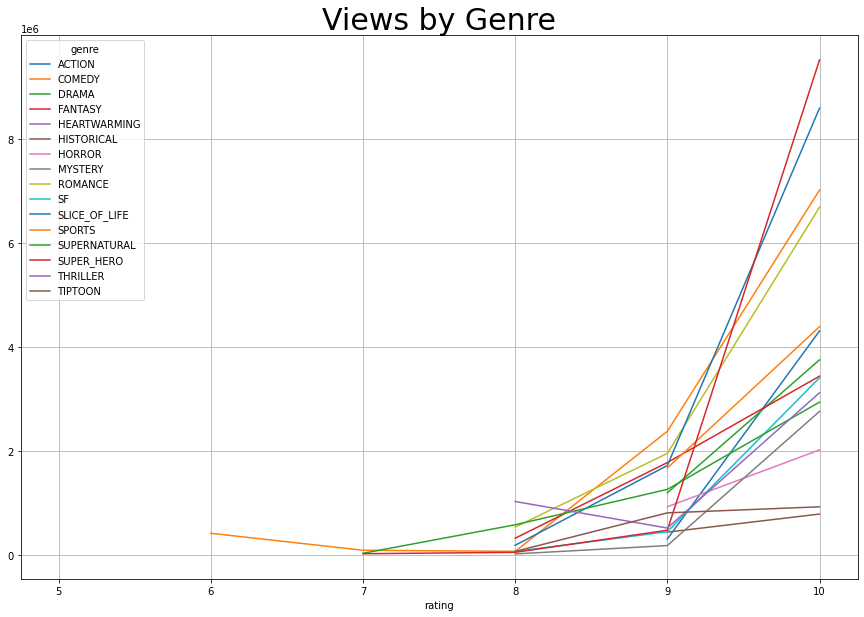

In [18]:
Y.plot(figsize=(15,10))
plt.grid()
plt.title("Views by Genre", fontsize=30)

<h1>Groupby Feature</h1>

Text(0, 0.5, 'Views')

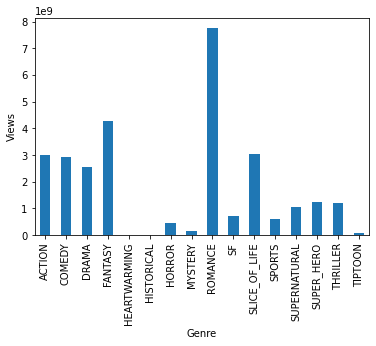

In [11]:
fac = df.groupby('genre')['views'].agg(sum)
fac.plot.bar()
plt.xlabel("Genre")
plt.ylabel("Views")


<h1>Interesting Question #1</h1>

Does the length affect the number of subscribers?

Text(0.5, 1.0, 'Does Length Affect Number of Subscribers?')

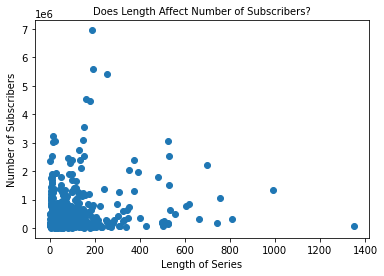

In [12]:
plt.scatter(df["length"], df["subscribers"])
plt.xlabel("Length of Series")
plt.ylabel("Number of Subscribers")
plt.title("Does Length Affect Number of Subscribers?", fontsize=10)


According to the graph there seems to be no correlation between number of subscribers and length of a series. The data is mostly clumped together.

<h1>Interesting Question #2</h1>

Do Views and Likes Correlate?

Text(0.5, 1.0, 'Do Views and Likes Correlate?')

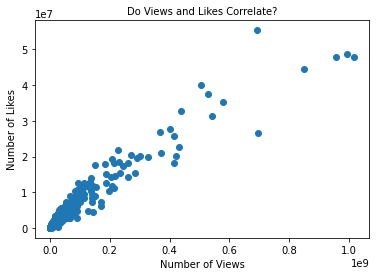

In [13]:
plt.scatter(df["views"], df["likes"])
plt.xlabel("Number of Views")
plt.ylabel("Number of Likes")
plt.title("Do Views and Likes Correlate?", fontsize=10)


You can see there's a clear correlation between the number of views and likes, the more views a series gets, it also get more likes.